In [ ]:
from model import NNet

In [ ]:
model_1 = NNet(model_to_load='../checkpoints/u_xception_final_dice.h5')
model_2 = NNet(model_to_load='../checkpoints/ures_xception_final_dice.h5')
model_3 = NNet(model_to_load='../checkpoints/uspp_xception_final_dice.h5')
model_4 = NNet(model_to_load='../checkpoints/u_resnet50v2_final_dice.h5')
model_5 = NNet(model_to_load='../checkpoints/ures_resnet50v2_final_dice.h5')
model_6 = NNet(model_to_load='../checkpoints/uspp_resnet50v2_final_dice.h5')
models = [model_1, model_2, model_3, model_4, model_5, model_6]

In [ ]:
predictions = []

for model in models:
    predictions.append(model.predict_test_data())

In [ ]:
import numpy as np

mean_ensemble = np.mean(np.array(predictions), axis=0)

In [ ]:
assert model_1.test_data_gen.numbers == model_2.test_data_gen.numbers == \
       model_3.test_data_gen.numbers == model_4.test_data_gen.numbers == \
       model_4.test_data_gen.numbers == model_5.test_data_gen.numbers == \
       model_6.test_data_gen.numbers

In [ ]:
model_1.test_images_predictions = mean_ensemble

In [ ]:
submission_path = '../submission_mean_ensemble_4_models.csv'
mean_sub = model_1.create_submission_file(path=submission_path, treshold=.4)

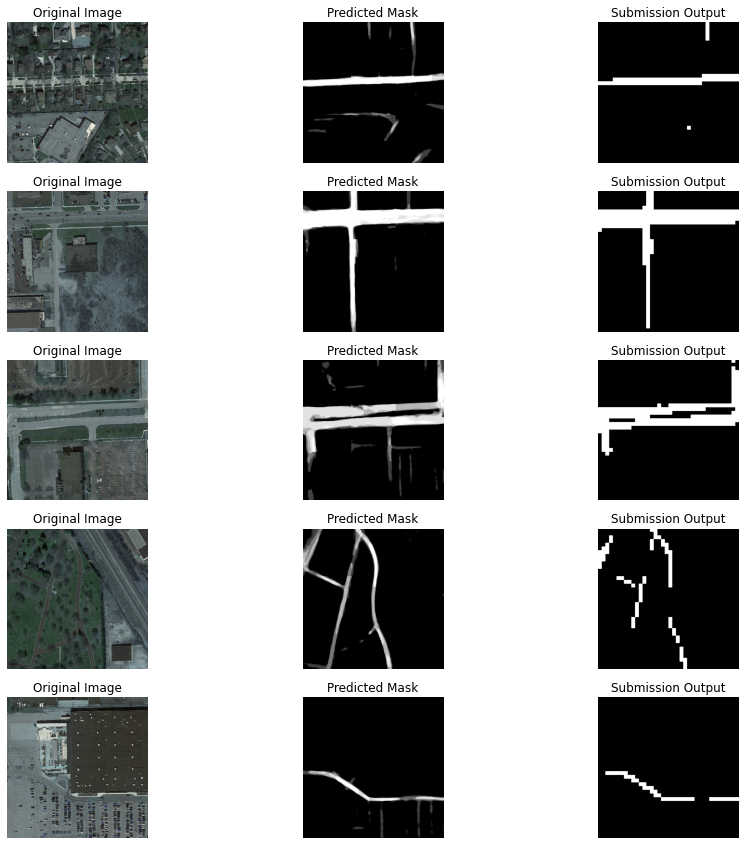

In [ ]:
model_1.display_test_predictions(submission_path)